In [1]:
!pip install geopandas

In [2]:
!pip install opencv-python

In [3]:
import geopandas as gpd
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import isfile, join
import glob
import cv2
import PIL.Image
import matplotlib.image

# Load and process data

**Initialize Important Variables**

In [4]:
#Create string variable to store directory of images
pwd=os.getcwd()
Folder='/CatMotion/*.jpg'
dirString=pwd+Folder
print("pwd =",dirString)

#Create variable to show number of images
imgTotal=len(glob.glob(dirString))

#Create String variables to be used in for loop to load in images
picDir='/home/jovyan/Micro Project 1/CatMotion/'
name='CatMotion'
ext='ss.jpg'

#Load test image
i=0
num=str(i+1)
call=picDir+name+num+ext
image = PIL.Image.open(call)

#Find size of images
width, height = image.size
x=height
y=width
print("Image Width:", width,"; Image Height:", height)

#Create labels for each image
labels=[str(i+1) for i in range(24)]
print(labels)

#Set variables to be used with array indices and means
columns=width*height
rows=imgTotal
axisNum=1 #axis=1, work along the rows, axis=0, work along the rows

pwd = /home/jovyan/Micro Project 1/CatMotion/*.jpg
Image Width: 80 ; Image Height: 45
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


**Create Empty Array to Store Flattened B&W Image Data**

In [5]:
images = np.zeros((columns, rows), int)
print("Size of Empty Array:",images.shape)

Size of Empty Array: (3600, 24)


**Test of Converting Image File to NumPy Array**

In [6]:
#Load test image
#i=0
#num=str(i+1)
#call=picDir+name+num+ext
#image = PIL.Image.open(call)

#Find size of image
#width, height = image.size
#print("Image Width: ", width,"Image Height:", height)

#Flatten Grayscale image to true B&W image
#image = image.convert('L')

#Convert B&W image to numpy array
#image=asarray(image)

#Flatten B&W image array to 1-dimensional array
#(This helps store the image in the "images" array)
#image=image.flatten()

#Store Flattened B&W image to "images" array
#images[:,i]=image[:,]

#Plot reshaped flattened image from "images" array (CONVERSION FINISHED)
#plt.imshow(images[:,0].reshape(x,y))

**Convert All Images to "Images" Array**

In [7]:
for i in range(imgTotal):
#    print(i) #debugging code
    num=str(i+1)
    call=picDir+name+num+ext
#    print(call) #debugging code
    imgtmp=PIL.Image.open(call)
    imgtmp=imgtmp.convert('L')
    imgtmp=asarray(imgtmp)
    imgtmp=imgtmp.flatten()
    images[:,i]=imgtmp[:,]
print("Shape of Images Array:",images.shape)

Shape of Images Array: (3600, 24)


**Test Saving Array to Image**

In [8]:
#matplotlib.image.imsave('test2.jpg', images[:,2-1].reshape(height,width))

**Test Saving Plot to Image**

In [9]:
#plt.imshow(images[:,imgTotal-1].reshape(x,y), cmap='gray')
#plt.savefig('test.jpg', dpi=240, bbox_inches='tight')
#plt.show,images.shape

**Centering the Data**

In [10]:
#Compute the mean of the axis
meanData=images.mean(axisNum, keepdims=True)
centeredData = images - meanData
print("Centered Data Shape:",centeredData.shape)

Centered Data Shape: (3600, 24)


**Display First Image of Centered Data**

<function matplotlib.pyplot.show(close=None, block=None)>

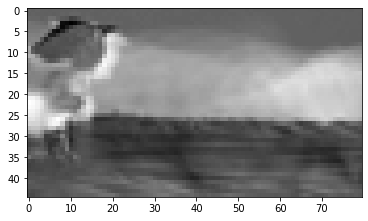

In [11]:
plt.imshow(centeredData[:,0].reshape(x,y),cmap='gray')
plt.savefig('CenteredData.jpg', dpi=240, bbox_inches='tight')
plt.show

Standardize Data

# SVD Code

**Block by Block SVD Code**

In [12]:
#A=centeredData
#print("Centered Data Shape:",A.shape)
#AT=A.T
#print("A Transpose Shape:",AT.shape)
#AAT=np.dot(A,AT)
#print("A*AT Shape:",AAT.shape)
#D=np.diag(centeredData.sum(axis=1))
#print("Diagonalized Shape:",D.shape)
#L=D-AAT
#print("L Shape:",L.shape)
#eVal, eVec = np.linalg.eigh(AAT)
#print("Eigenvalues Shape:",eVal.shape)
#print("Eigenvectors Shape:",eVec.shape)

#ATA=np.dot(AT,A)
#print("AT*A Shape:",ATA.shape)
#D=np.diag(centeredData.sum(axis=1))
#print("Diagonalized Shape:",D.shape)
#L=D-ATA
#print("L Shape:",L.shape)
#eVal1, eVec1 = np.linalg.eigh(ATA)
#print("Eigenvalues Shape:",eVal1.shape)
#print("Eigenvectors Shape:",eVec1.shape)

#mageVal=np.absolute(eVal)
#sort=np.argsort(mageVal)
#bigIndex=sort[mageVal.size-1]
#print("Largest Eigenvalue:",
#      mageVal[bigIndex],
#      "at index:",bigIndex)

#eVal.shape

#v = eVec[:,bigIndex]
#print("Shape of VT:",v.shape)
#plt.imshow(v.reshape(45,80), cmap='gray')
#plt.savefig('LargestEigenvector.jpg', dpi=240, bbox_inches='tight')
#plt.show

**Single Line SVD Code**

In [13]:
U, S, VT = np.linalg.svd(centeredData)

In [14]:
print("Shape of U:",U.shape)
print("Shape of S:",S.shape)
print("Shape of VT:",VT.shape)
#print("S:",S)

Shape of U: (3600, 3600)
Shape of S: (24,)
Shape of VT: (24, 24)


# Plot Singular Values

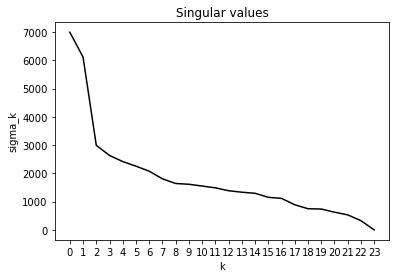

In [15]:
plt.plot(S, c='black')
plt.xticks(range(24))
plt.title('Singular values')
plt.ylabel('sigma_k')
plt.xlabel('k')
plt.savefig('singularvalues.jpg', dpi=150, bbox_inches='tight')
plt.show() 

# Variance Explained By Principal Components

*First PC Explains:*

In [16]:
S[0]**2/sum([s**2 for s in S])

0.3462183465661035

*First Two PCs Explains:*

In [17]:
(S[0]**2+S[1]**2)/sum([s**2 for s in S])

0.6109065466455551

*First Three PCs Explains:*

In [18]:
(S[0]**2+S[1]**2+S[2]**2)/sum([s**2 for s in S])

0.6742146849404704

*First Four PCs Explains:*

In [19]:
(S[0]**2+S[1]**2+S[2]**2+S[3]**2)/sum([s**2 for s in S])

0.7233602582600303

*First Five PCs Explains:*

In [20]:
(S[0]**2+S[1]**2+S[2]**2+S[3]**2+S[4]**2)/sum([s**2 for s in S])

0.7647421966394639

**Test to See What H/Vstack Does**

In [21]:
#test=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18],[19,20,21]])
#U1,S1,VT1=np.linalg.svd(test)
#print("test Shape:",test.shape)
#print("U1 Shape:",U1.shape)
#print("S1 Shape:",S1.shape)
#print("V1 Shape:",VT1.shape)
#print(np.diag(S1))
#D,N=test.shape
#print("D =",D,"; N =",N)
#Sigma1=np.hstack([np.diag(S1),np.zeros((N, abs(N-D)))])
#print("Sigma1 Shape:",Sigma1.shape)
#print(Sigma1)

# Create Score Plot

Shape of np.diag(S): (24, 24)
D =  3600 ; N = 24
Shape of Sigma: (24, 24)
Shape of V: (24, 24)
Shape of Reduced Data = (2, 24)


(<function matplotlib.pyplot.show(close=None, block=None)>, (3600, 24))

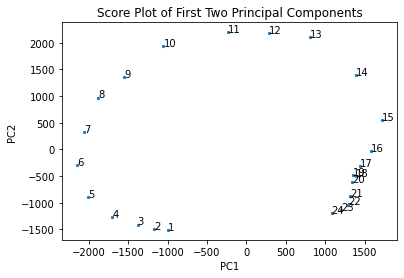

In [45]:
print("Shape of np.diag(S):",np.diag(S).shape)
D, N = centeredData.shape
print("D = ",D,"; N =",N)
Sigma = np.hstack([np.diag(S), np.zeros((N, 0))])
print("Shape of Sigma:",Sigma.shape)
print("Shape of V:",VT.shape)
reducedData = (Sigma @ VT)[:2,:]
print("Shape of Reduced Data =", reducedData.shape)

plt.scatter(
    reducedData[0,:], 
    reducedData[1,:],
    s=5
)
for i in range(24):
    plt.annotate(labels[i],(reducedData[0,i],reducedData[1,i]))
plt.title('Score Plot of First Two Principal Components')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.savefig('ScorePlot.jpg', dpi=240, bbox_inches='tight')
plt.show,images.shape

In [46]:
VT

array([[-1.42679282e-01, -1.67727490e-01, -1.97359082e-01,
        -2.43598270e-01, -2.86739721e-01, -3.06765058e-01,
        -2.94467145e-01, -2.69171754e-01, -2.21906033e-01,
        -1.50580908e-01, -3.39124038e-02,  4.09320605e-02,
         1.14832043e-01,  1.98973332e-01,  2.45374589e-01,
         2.26334150e-01,  2.05746411e-01,  1.98614736e-01,
         1.93363106e-01,  1.91717712e-01,  1.87786265e-01,
         1.85132844e-01,  1.71499494e-01,  1.54600403e-01],
       [-2.46714407e-01, -2.43906497e-01, -2.30418787e-01,
        -2.06183257e-01, -1.45176798e-01, -4.83846890e-02,
         5.37104022e-02,  1.58685904e-01,  2.21328177e-01,
         3.17631762e-01,  3.59201943e-01,  3.56467279e-01,
         3.44786657e-01,  2.28037108e-01,  9.09423090e-02,
        -3.86965089e-03, -5.10144302e-02, -8.20280620e-02,
        -7.94267771e-02, -1.01099134e-01, -1.42002169e-01,
        -1.69062218e-01, -1.86376617e-01, -1.95128047e-01],
       [ 3.67759845e-01,  3.92989563e-01,  2.88482317e

# Create Loading Plots

PC1:  (3600,)  
 [-0.00169451 -0.00157899 -0.00172376 ... -0.0033406  -0.0038699
 -0.00291147]


(<function matplotlib.pyplot.show(close=None, block=None)>, (3600, 24))

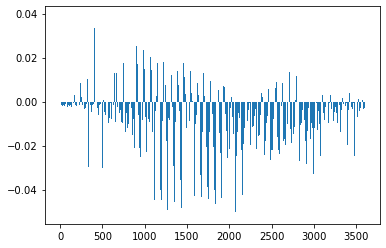

In [25]:
PC1 = U[:,0]
print("PC1: ", PC1.shape, " \n", PC1)
plt.bar(range(x*y), PC1)
plt.savefig('PC1LoadPlot.jpg', dpi=240, bbox_inches='tight')
plt.show,images.shape

PC2:  (3600,)  
 [ 1.26534239e-05 -3.02601264e-05  3.00161843e-05 ...  3.88347341e-03
  4.33699327e-03  5.46249977e-03]


(<function matplotlib.pyplot.show(close=None, block=None)>, (3600, 24))

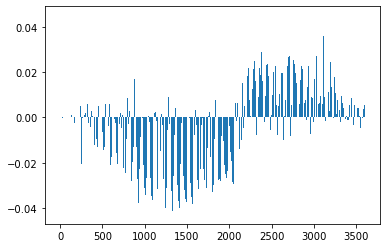

In [26]:
PC2 = U[:,1]
print("PC2: ", PC2.shape, " \n", PC2)
plt.bar(range(x*y), PC2)
plt.savefig('PC2LoadPlot.jpg', dpi=240, bbox_inches='tight')
plt.show,images.shape

# Create Reconstruction of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

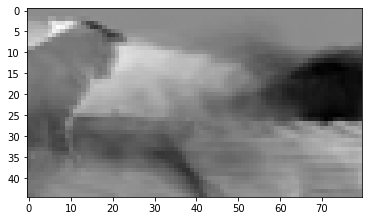

In [27]:
plt.imshow(PC1.reshape(x,y), cmap='gray')
plt.savefig('ReconstructedDataPC1.jpg', dpi=240, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

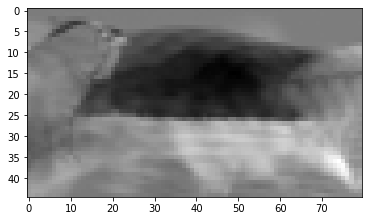

In [47]:
plt.imshow(PC2.reshape(x,y), cmap='gray')
plt.savefig('ReconstructedDataPC2.jpg', dpi=240, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

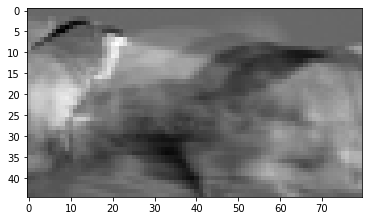

In [70]:
PCx = U[:,2]
plt.imshow(PCx.reshape(x,y), cmap='gray')
plt.savefig('ReconstructedDataPC2.jpg', dpi=240, bbox_inches='tight')
plt.show